In [1]:
from numpy.random import seed
from numpy.random import shuffle
import numpy as np
import random

def lab():
    k=25
    sq1 = np.arange(25,34)
    sq1 = np.resize(sq1,(3,3))
    for i in sq1:
        for j in range(3):
            i[j] = k
        k+=1
    return sq1


def process_s(sequence):
    news= ""
    for i in sequence:
        if i != '[' and i != ']' and i != ',':
            news +=str(i)+" "
    news = news.split()
    news =  list(map(int,news))

def ch(sequence):
    k=0
    dummy = np.zeros(17, dtype=np.int64)
    sequence = np.concatenate((sequence,dummy)).tolist()
    la = lab().tolist()
    sq = []
    while len(sq) < 3:
        k = random.randint(0,32)
        if k%7 < 4 and k//6 not in sq:
            sq.append(k//6)
            for i in range(3):
                sequence.insert(k,la[len(sq)-1][0])
    return str(sequence)

def process_string(sequence):
    news= ""
    for i in sequence:
        if i != '0' and i != '[' and i != ']' and i != ',':
            news +=i
    return news.split()


# seed(1)
def gentable():
    #42
    sequence = np.arange(1,26)
    shuffle(sequence)
    for i in range(25):
        sequence[i] = sequence[i]//5 + 1
    s = ch(sequence)
    sequence = process_string(s)
    for i in range(8):
        sequence.append('0')
    table = np.resize(sequence,(6,7))
    return table
    # lp = np.arange(42,48)
    # shuffle(lp)
    # lp = np.reshape(lp,(6,1))
    # table = np.hstack((table,lp ))
    # return table


In [3]:
import matplotlib.pylab as pl

names = ["Python","WT","DBMS","Flat","CO", "OS"]
Labs = ["L1", "L2","L3"]
subphrs = 5 #25
labhrs = 9
extrahrs = 8
examhrs = 6


def conv(table):
    for i in table:
        for j in range(len(i)):
            if int(i[j]) < 7:
                if int(i[j]) == 0:
                    i[j] = 'Unallocated'
                else:
                    i[j] = names[int(i[j])-1]
            else:
                i[j] = Labs[int(i[j]) - 25 ]
    return table



table = gentable().tolist()
table = conv(table)
print(table)


[['CO', 'DBMS', 'Python', 'OS', 'WT', 'Flat', 'WT'], ['CO', 'L3', 'L3', 'L3', 'CO', 'Python', 'DBMS'], ['WT', 'CO', 'DBMS', 'WT', 'Python', 'L2', 'L2'], ['L2', 'DBMS', 'Python', 'CO', 'DBMS', 'Flat', 'Flat'], ['Flat', 'Flat', 'WT', 'L1', 'L1', 'L1', 'Unallocated'], ['Unallocated', 'Unallocated', 'Unallocated', 'Unallocated', 'Unallocated', 'Unallocated', 'Unallocated']]


[]

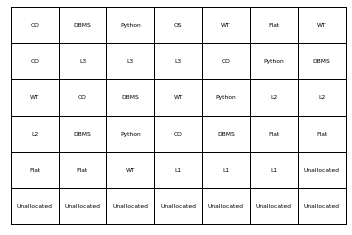

In [4]:

ny = len(table)
nx = len(table[0])

pl.figure()
tb = pl.table(cellText=table, loc=(0,0), cellLoc='center')

tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(1/ny)
    cell.set_width(1/nx)

ax = pl.gca()
ax.set_xticks([])
ax.set_yticks([])